In [168]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import datetime
import gmaps 
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [169]:
path = "mass_shooting_events_stanford_msa_release_06142016.csv"
# path2 = "gun-violence-data_01-2013_03-2018.csv"
# path3 = "shootings_2018_2022.csv"
data_df = pd.read_csv(path)
data_df.head()

,state,total_fatalities,victims_injured,month,day,year
0,Texas,17,32,8,1,1966
1,Arizona,5,1,11,12,1966
2,Louisiana,10,13,12,31,1972
3,Illinois,1,3,1,17,1974
4,New York,3,7,12,30,1974


In [170]:
data_df.columns

Index(['state', 'total_fatalities', 'victims_injured', 'month', 'day', 'year'], dtype='object')

In [171]:
#get total fatalities by state
state_data = data_df["total_fatalities"].value_counts()

In [177]:
victimsbystate_df = data_df.groupby('state')[['total_fatalities']].sum()
# victimsbystate_df.reset_index(inplace=True)
victimsbystate_df.sort_values(by=['total_fatalities'], ascending=False, inplace=True)
victimsbystate_df.head()

,total_fatalities
state,
California,386
Texas,376
Florida,207
Illinois,189
North Carolina,123


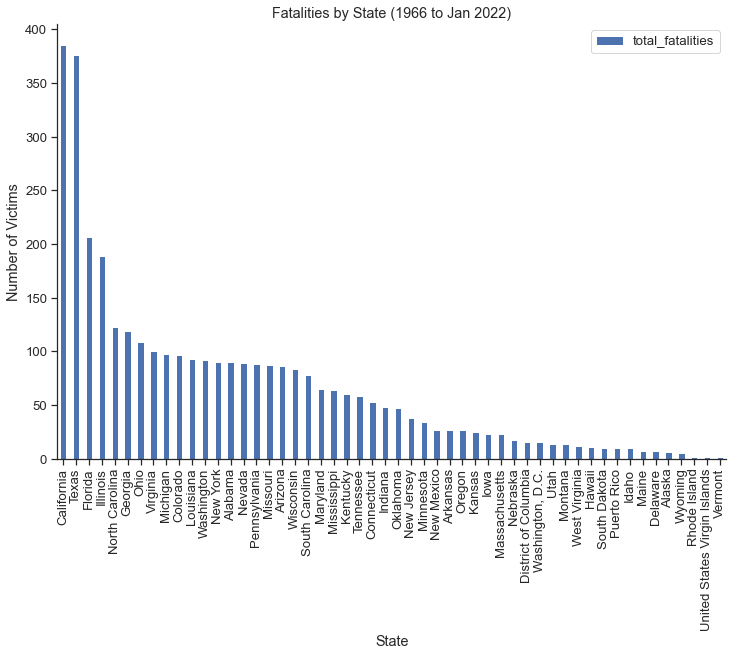

In [173]:
x = victimsbystate_df.plot(kind='bar')
plt.title("Fatalities by State (1966 to Jan 2022)")
plt.xlabel("State")
plt.ylabel("Number of Victims")
plt.show()

In [174]:
coordinates_df = pd.read_csv("state_coordinates.csv")
coordinates_df.columns=["state","Latitude","Longitude"]

In [175]:
victimsbystate_df.reset_index(inplace=True)
merged_df = pd.merge(victimsbystate_df, coordinates_df, on="state")
merged_df.head()

,state,total_fatalities,Latitude,Longitude
0,California,386,36.778259,-119.417931
1,Texas,376,31.000000,-100.000000
2,Florida,207,27.994402,-81.760254
3,Illinois,189,40.000000,-89.000000
4,North Carolina,123,35.782169,-80.793457


In [176]:
# pip install plotly-express

In [161]:
#add total fatalities per year
#data_df['date'] = data_df['date'].datetime.datetime.strftime('%Y')

# data_df['date'] = pd.to_datetime(data_df['date'],format='%Y')
# data_df
# # data_df['date'] = pd.to_datetime(df['date'],format='%m%d%Y')
# data_df['year'] = pd.DatetimeIndex(df['date']).year
# data_df['date'] = data_df['date'].datetime.datetime.year

# mayra = full_data.copy()
# mayra = mayra['Full Date']
# mayra = pd.to_datetime(mayra)
# mayra = mayra.to_frame()
# #mayra = mayra.apply(lambda d: d.day() )
# #df['time'] = df['date'].dt.strftime('%H:%M:%S')
# #mayra = mayra.datetime.datetime('%Y')
# #mayra = mayra.dt.year()
# mayra

In [162]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
us_state_to_abbrev = {state: abbrev for state, abbrev in us_state_to_abbrev.items()}
merged_df['abbrev'] = merged_df['state'].map(us_state_to_abbrev)
merged_df.head()

,state,total_fatalities,Latitude,Longitude,abbrev
0,California,386,36.778259,-119.417931,CA
1,Texas,376,31.000000,-100.000000,TX
2,Florida,207,27.994402,-81.760254,FL
3,Illinois,189,40.000000,-89.000000,IL
4,North Carolina,123,35.782169,-80.793457,NC


In [163]:
# import plotly.express as px
# fig = px.choropleth(merged_df,
#                     locations='abbrev', 
#                     locationmode='USA-states', 
#                     scope='usa',
#                     color='total_fatalities',
#                     color_continuous_scale='Viridis_r', 
#               )
# fig.show()

In [164]:
victimsbyyear_df = data_df.groupby('year')[['total_fatalities']].sum()
# victimsbystate_df.reset_index(inplace=True)
victimsbyyear_df.sort_values(by=['year'], ascending=False, inplace=True)
victimsbyyear_df.head()

,total_fatalities
year,
2022,142
2021,607
2020,456
2019,493
2018,159


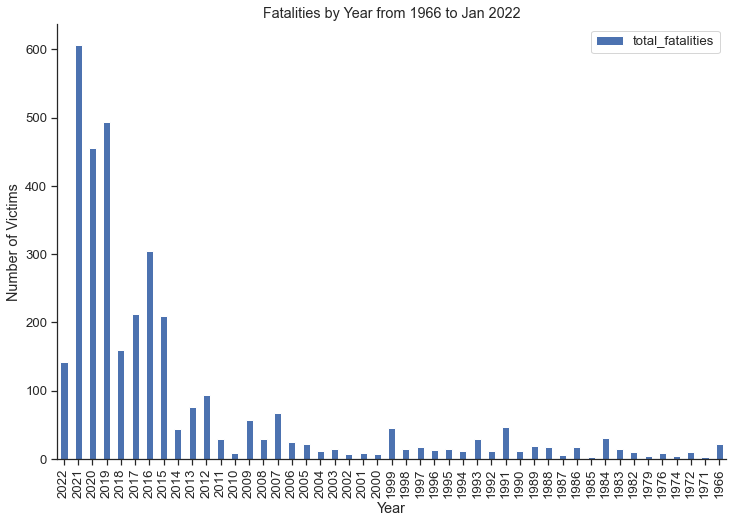

In [165]:
x = victimsbyyear_df.plot(kind='bar')
plt.title("Fatalities by Year from 1966 to Jan 2022")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.show()

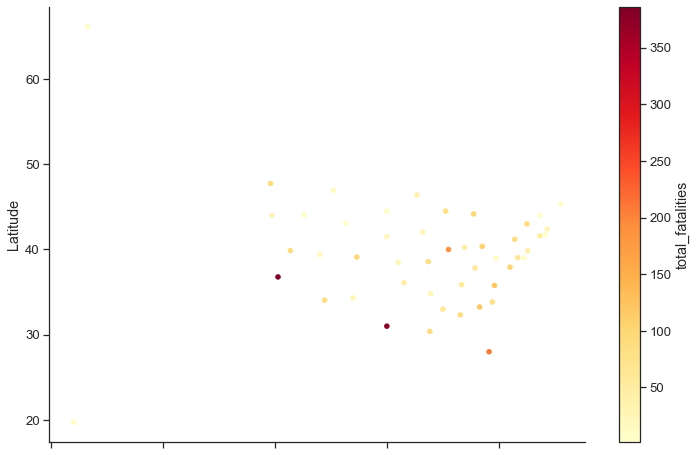

In [129]:
merged_df.plot(x="Longitude", y="Latitude", kind="scatter", c="total_fatalities",
        colormap="YlOrRd");

In [187]:
locations = merged_df[["Latitude","Longitude"]]
fatalities = merged_df["total_fatalities"]
fig = gmaps.figure()

fatalities_layer = gmaps.heatmap_layer(locations, weights=fatalities,
                                 dissipating=False,max_intensity=10,
                                 point_radius=1)
fig.add_layer(fatalities_layer)
fig

Figure(layout=FigureLayout(height='420px'))

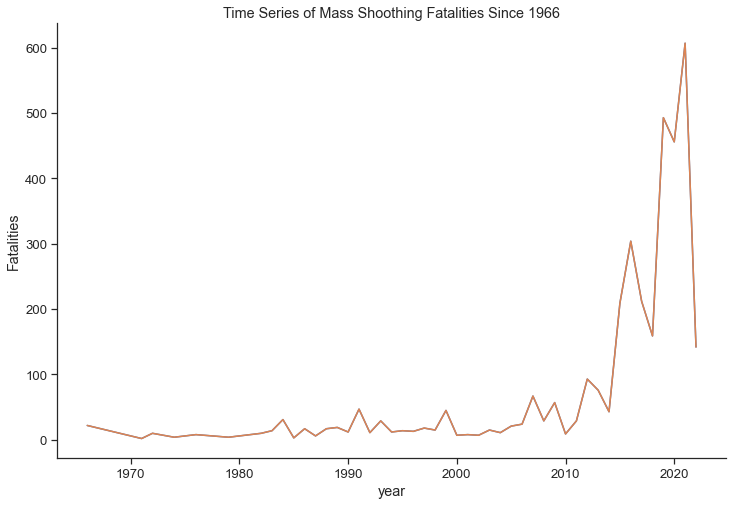

In [186]:
victimsbyyear_df['total_fatalities'].plot();
plt.ylabel('Fatalities')
plt.title('Time Series of Mass Shoothing Fatalities Since 1966')
victimsbyyear_df['total_fatalities'].plot();